In [1]:
import time
import sys; sys.path.insert(0, "..")
from src.models import NLM, LUNA
from src.utils import generate_data, format_time, neg_log_likelihood, epistemic_uncertainty

In [2]:
from autograd import numpy as np
import matplotlib.pyplot as plt

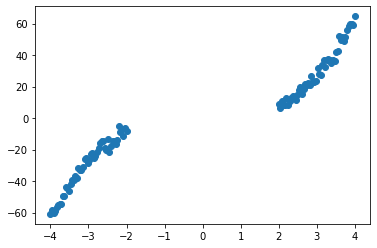

In [3]:
x, y, x_test, y_test = generate_data(number_of_points=50, noise_variance=9)
plt.scatter(x, y)
plt.show()

# Extract test data (gap vs. non-gap)
gap_idx = np.logical_and(x_test > -2, x_test < 2)
x_test_gap = x_test[gap_idx].reshape(1,-1)
y_test_gap = y_test[gap_idx].reshape(1,-1)

non_gap_idx = np.logical_or(np.logical_and(x_test > -4, x_test < -2),np.logical_and(x_test > 2, x_test < 4))
x_test_non_gap = x_test[non_gap_idx].reshape(1,-1)
y_test_non_gap = y_test[non_gap_idx].reshape(1,-1)

In [4]:
def experiment_NLM_1D(reg_param, step_size=1e-2, max_iteration=1500, x_train=x, y_train=y):
    activation_fn_type = 'relu'
    activation_fn = lambda x: np.maximum(np.zeros(x.shape), x)

    input_dim = 1
    output_dim = 1
    width = [50,50] # using the architecture used in the paper

    architecture = {
        'width': width,
        'input_dim': input_dim,
        'output_dim': output_dim,
        'activation_fn_type': 'relu',
        'activation_fn_params': 'rate=1',
        'activation_fn': activation_fn
    }

    params = {
        'step_size': step_size,
        'max_iteration': max_iteration,
        'random_restarts': 1,
        'reg_param': reg_param
    }

    rand_state = 207
    random = np.random.RandomState(rand_state)

    nlm = NLM(architecture, random=random)
    print("")
    print(f"===== NLM [ Regularization: {reg_param} ]  =====")
    print("")
    t0 = time.time()
    nlm.fit(x_train, y_train, params)
    print("")
    print("Training took {:} (h:mm:ss)".format(format_time(time.time()-t0)))

    return nlm

In [5]:
reg_grid = [0., 0.001, 0.01, 0.1, 1., 10., 100.,1000.]

step_size = 1e-2
max_iteration_nlm = 5000


In [6]:
nlm_list = []
for reg in reg_grid:
    nlm = experiment_NLM_1D(reg, step_size = step_size, max_iteration = max_iteration_nlm)
    nlm_list.append(nlm)


===== NLM [ Regularization: 0.0 ]  =====

Iteration 0 loss 8587.481611288753; gradient mag: 19682.968591880013
Iteration 100 loss 79.28381000937924; gradient mag: 67.17195470247607
Iteration 200 loss 20.459512160090217; gradient mag: 35.64197168386627
Iteration 300 loss 7.409518563068642; gradient mag: 8.84767179049428
Iteration 400 loss 6.633258063525677; gradient mag: 2.2220829951600427
Iteration 500 loss 6.236652661179904; gradient mag: 6.327533224017855
Iteration 600 loss 6.079687719321408; gradient mag: 1.2535054839922946
Iteration 700 loss 5.938098381265362; gradient mag: 5.117608346914405
Iteration 800 loss 5.86286999536765; gradient mag: 2.2135037630893324
Iteration 900 loss 5.810962238414435; gradient mag: 6.662549170842464
Iteration 1000 loss 5.77040490602296; gradient mag: 0.9347093390459146
Iteration 1100 loss 5.734762022679131; gradient mag: 2.568838332782206
Iteration 1200 loss 5.692559806435834; gradient mag: 2.4782723481605786
Iteration 1300 loss 5.6669571750775525; gr

Iteration 1300 loss 5.578337562460568; gradient mag: 4.82553588250537
Iteration 1400 loss 5.54585188694606; gradient mag: 2.92495430308991
Iteration 1500 loss 5.517841323999151; gradient mag: 7.931923783345573
Iteration 1600 loss 5.495217835429886; gradient mag: 9.470070501871334
Iteration 1700 loss 5.4753305265355765; gradient mag: 10.546723242331161
Iteration 1800 loss 5.456785551464622; gradient mag: 14.81259858218122
Iteration 1900 loss 5.438127061050529; gradient mag: 4.417313669422588
Iteration 2000 loss 5.429975708324543; gradient mag: 16.282383785659636
Iteration 2100 loss 5.41580946580379; gradient mag: 5.5362608053555515
Iteration 2200 loss 5.453526001773587; gradient mag: 44.93709129817957
Iteration 2300 loss 5.3800294921508165; gradient mag: 5.987707109183021
Iteration 2400 loss 5.373482972903619; gradient mag: 9.207037743891691
Iteration 2500 loss 5.365028039043973; gradient mag: 10.935778654849505
Iteration 2600 loss 5.389620591103008; gradient mag: 42.315846085548145
Ite

Iteration 2700 loss 6.121285810527511; gradient mag: 34.779057030781985
Iteration 2800 loss 6.080953862435761; gradient mag: 4.0435343115601095
Iteration 2900 loss 6.07599955018816; gradient mag: 21.683126112685493
Iteration 3000 loss 6.086187212523558; gradient mag: 40.090846814966326
Iteration 3100 loss 6.1702599227606205; gradient mag: 60.19888188305297
Iteration 3200 loss 6.027184287755592; gradient mag: 2.560484008009469
Iteration 3300 loss 6.110686228720675; gradient mag: 67.70985564080746
Iteration 3400 loss 6.018478586673199; gradient mag: 15.24596432977929
Iteration 3500 loss 6.007726288520138; gradient mag: 14.670702408172254
Iteration 3600 loss 5.993239757021241; gradient mag: 2.242127254782928
Iteration 3700 loss 5.987253376546684; gradient mag: 5.265636103532889
Iteration 3800 loss 5.980704389624279; gradient mag: 2.090365652391763
Iteration 3900 loss 5.973620245915842; gradient mag: 2.2806959003822085
Iteration 4000 loss 5.967961014789859; gradient mag: 4.1022955230544405

Iteration 4000 loss 20.365272594718213; gradient mag: 20.754132221106175
Iteration 4100 loss 19.790191677603836; gradient mag: 9.380416388090461
Iteration 4200 loss 19.271730641427176; gradient mag: 13.73921080648043
Iteration 4300 loss 18.7613755750698; gradient mag: 17.799260525560694
Iteration 4400 loss 19.36774948620847; gradient mag: 106.34787202033907
Iteration 4500 loss 17.871301123570973; gradient mag: 5.467845259522499
Iteration 4600 loss 17.414227474096677; gradient mag: 2.84739709145537
Iteration 4700 loss 16.980594507148847; gradient mag: 3.870465134284431
Iteration 4800 loss 16.55370321459743; gradient mag: 2.571519408347186
Iteration 4900 loss 16.16140092747403; gradient mag: 8.81020751493892

Training took 0:05:06 (h:mm:ss)

===== NLM [ Regularization: 1000.0 ]  =====

Iteration 0 loss 9651.606111125615; gradient mag: 19684.809524007116
Iteration 100 loss 671.0842940475109; gradient mag: 74.43505918658691
Iteration 200 loss 470.57986766992656; gradient mag: 32.9946794473

## Plot prior samples

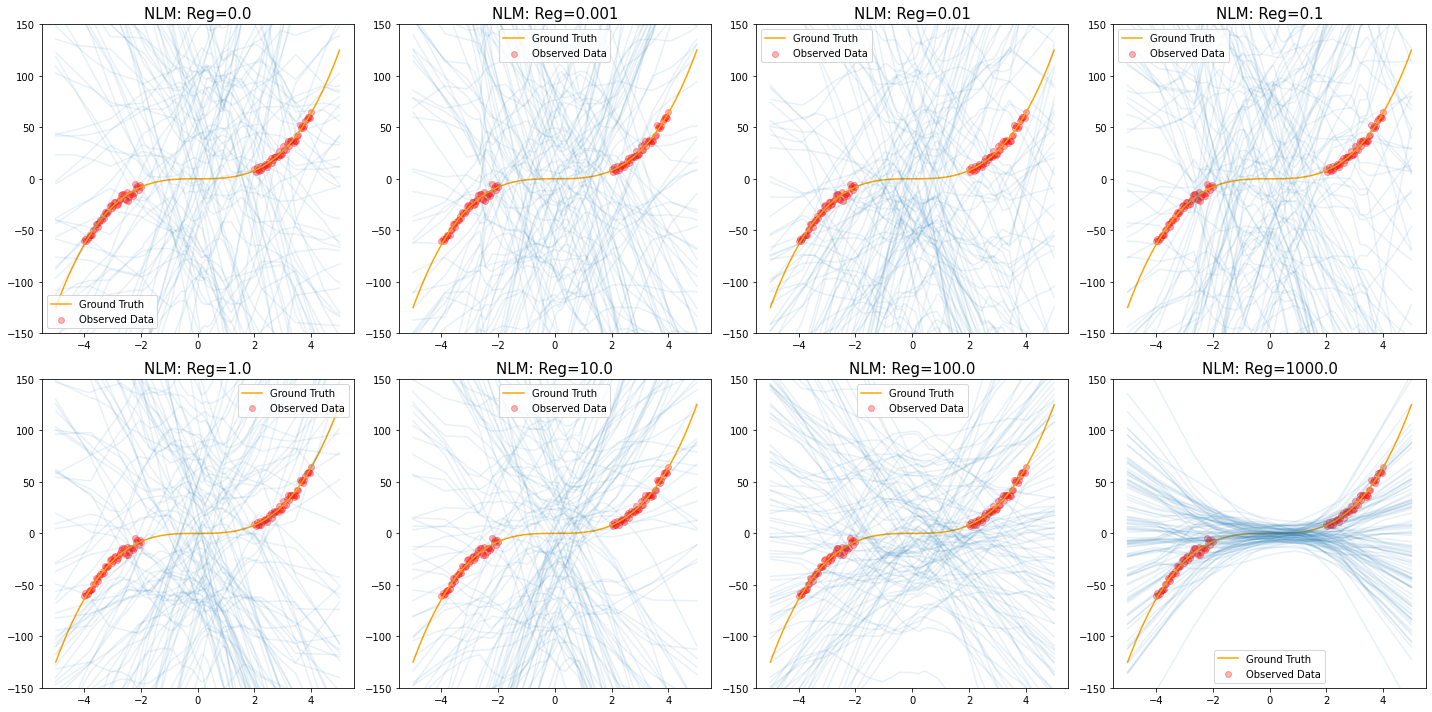

In [7]:
prior_mean = 0; prior_var = 9; noise_var = 9

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
for i, ax in enumerate(axes.flat):
    nlm = nlm_list[i]
    y_prior = nlm.get_prior_preds(x_test, w_prior_mean = prior_mean, w_prior_cov=prior_var, noise_var=noise_var)
    ax.scatter(x[0,:], y[0,:], color='red', alpha=0.3, label='Observed Data')
    ax.plot(x_test[0,:], x_test[0,:]**3, color='orange', label="Ground Truth")
    ax.plot(x_test[0,:], y_prior.T, color='tab:blue', alpha=0.1)
    ax.set_title(f"NLM: Reg={reg_grid[i]}",fontsize = 15)
    ax.set_ylim([-150, 150])
    ax.legend(loc='best')
plt.subplots_adjust(hspace=0.3)
plt.tight_layout()
plt.show()



## Plot posterior samples

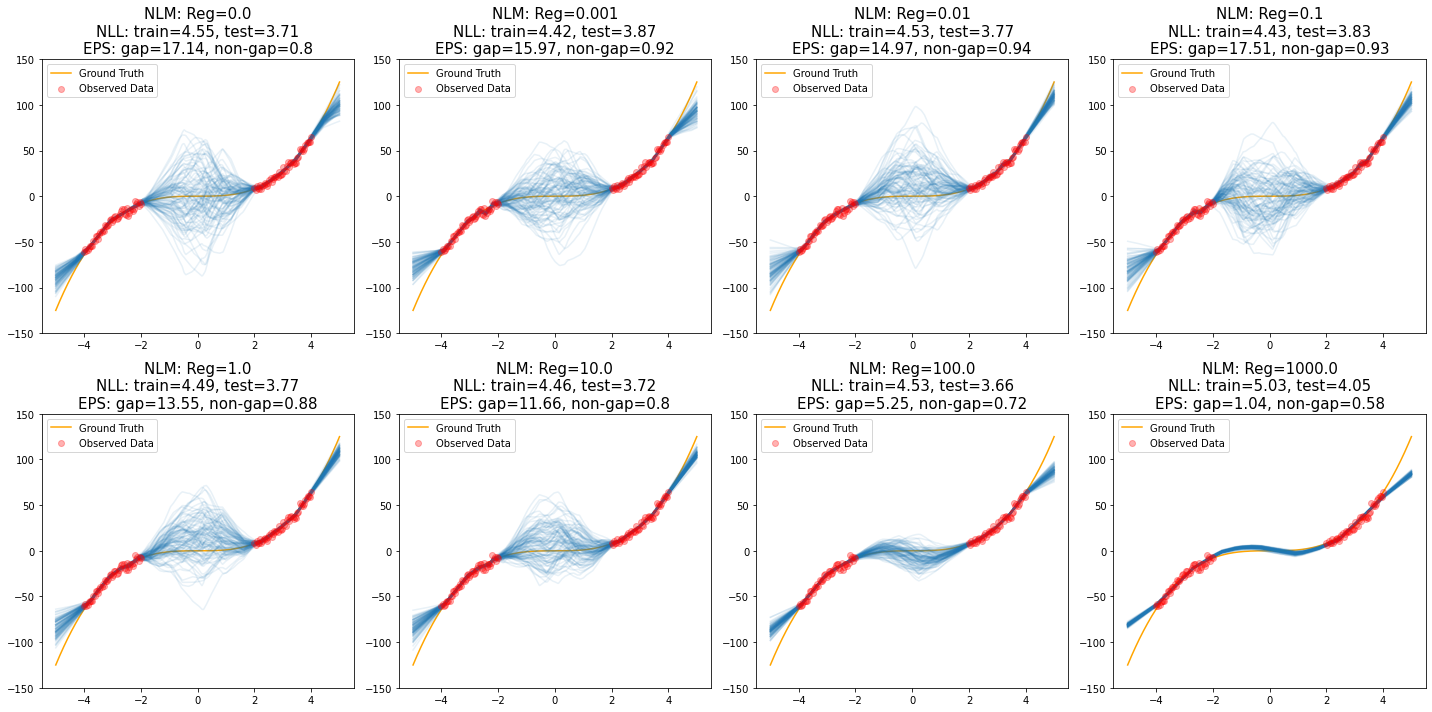

In [10]:
nll_train_list_nlm = []
nll_test_list_nlm = []
eps_gap_list_nlm = []
eps_non_gap_list_nlm = []

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
for i, ax in enumerate(axes.flat):
    nlm = nlm_list[i]
    y_posterior = nlm.get_posterior_preds(x_test, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var)
#     y_posterior += np.random.normal(0, noise_var**0.5, size = y_posterior.shape)
    
    ax.scatter(x[0,:], y[0,:], color='red', zorder = 1000, alpha=0.3, label='Observed Data')
    ax.plot(x_test[0,:], x_test[0,:]**3, color='orange', label="Ground Truth")
    ax.plot(x_test[0,:], y_posterior.T, color='tab:blue', alpha=0.1)
    ax.set_ylim([-150, 150])
    
    y_posterior_train = nlm.get_posterior_preds(x, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var, n_models = 5000)
    y_posterior_train_noise = y_posterior_train + np.random.normal(0, noise_var**0.5, size=y_posterior_train.shape)
    
    y_posterior_gap = nlm.get_posterior_preds(x_test_gap, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var, n_models = 5000)
    y_posterior_gap_noise = y_posterior_gap + np.random.normal(0, noise_var**0.5, size=y_posterior_gap.shape)

    y_posterior_non_gap = nlm.get_posterior_preds(x_test_non_gap, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var, n_models = 5000)
    y_posterior_non_gap_noise = y_posterior_non_gap + np.random.normal(0, noise_var**0.5, size=y_posterior_non_gap.shape)
    
    nll_train_list_nlm.append(np.round(neg_log_likelihood(y_posterior_train_noise, y, noise_var), 2))
    nll_test_list_nlm.append(np.round(neg_log_likelihood(y_posterior_non_gap_noise, y_test_non_gap, noise_var), 2))
    eps_gap_list_nlm.append(np.round(epistemic_uncertainty(y_posterior_gap), 2))
    eps_non_gap_list_nlm.append(np.round(epistemic_uncertainty(y_posterior_non_gap), 2))
    
    ax.set_title(f"NLM: Reg={reg_grid[i]}\nNLL: train={nll_train_list_nlm[i]}, test={nll_test_list_nlm[i]}\nEPS: gap={eps_gap_list_nlm[i]}, non-gap={eps_non_gap_list_nlm[i]}",fontsize=15)
    ax.legend(loc='best')
plt.subplots_adjust(hspace=0.3)
plt.tight_layout()
plt.show()


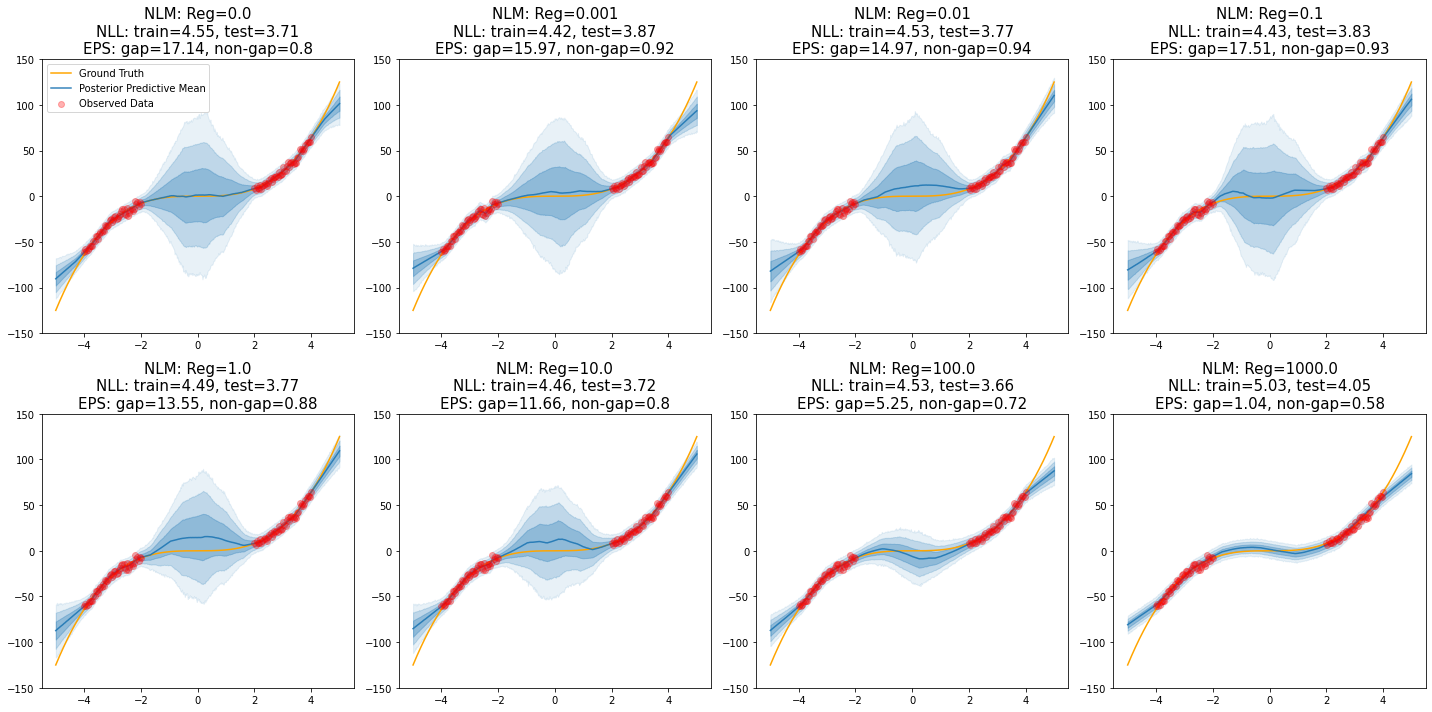

In [11]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
for i, ax in enumerate(axes.flat):
    nlm = nlm_list[i]
    y_posterior = nlm.get_posterior_preds(x_test, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var, n_models = 5000)
    y_posterior += np.random.normal(0, noise_var**0.5, size = y_posterior.shape)
    
    pp_upper = np.percentile(y_posterior, 97.5, axis=0)
    pp_lower = np.percentile(y_posterior, 2.5, axis=0)
    pp_upper2 = np.percentile(y_posterior, 84, axis=0)
    pp_lower2 = np.percentile(y_posterior, 16, axis=0)
    pp_upper3 = np.percentile(y_posterior, 99.85, axis=0)
    pp_lower3 = np.percentile(y_posterior, 0.15, axis=0)
    pp_mean = np.mean(y_posterior, axis=0)

    ax.scatter(x[0,:], y[0,:], color='red', zorder = 1000, alpha=0.3, label='Observed Data')
    ax.plot(x_test[0,:], x_test[0,:]**3, color='orange', label="Ground Truth")
    ax.plot(x_test[0,:], pp_mean, color='tab:blue', alpha=0.9, label='Posterior Predictive Mean')
    ax.fill_between(x_test[0,:], pp_upper, pp_lower, color='tab:blue', alpha=0.2)
    ax.fill_between(x_test[0,:], pp_upper2, pp_lower2, color = 'tab:blue', alpha = 0.3)
    ax.fill_between(x_test[0,:], pp_upper3, pp_lower3, color = 'tab:blue', alpha = 0.1)

    ax.set_ylim([-150, 150])
    ax.set_title(f"NLM: Reg={reg_grid[i]}\nNLL: train={nll_train_list_nlm[i]}, test={nll_test_list_nlm[i]}\nEPS: gap={eps_gap_list_nlm[i]}, non-gap={eps_non_gap_list_nlm[i]}",fontsize=15)

    if i == 0:
        ax.legend(loc='best')
plt.subplots_adjust(hspace=0.3)
plt.tight_layout()
plt.show()

